In [9]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpltex
from matplotlib.patches import PathPatch

In [11]:
def tf_by_td_inertial(tm_by_td,tg_by_td,U0=3.):
    
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdamped(tm_by_td,tg_by_td,U0=3.):
    
    return (np.exp(U0)/U0)*(((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))

def tf_by_td_new(tm_by_td,tg1_by_td,tg2_by_td,tg3_by_td,
                 td1_by_td,td2_by_td,td3_by_td,U0=3.):
  
    Inertial_Denominator = 1./( tf_by_td_inertial(tm_by_td,tg1_by_td)*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial(tm_by_td,tg2_by_td)*(1./td2_by_td ) ) +\
                    1./( tf_by_td_inertial(tm_by_td,tg3_by_td)*(1./td3_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped(tm_by_td,tg1_by_td) + \
                    td2_by_td*tf_by_td_overdamped(tm_by_td,tg2_by_td) +\
                    td3_by_td*tf_by_td_overdamped(tm_by_td,tg3_by_td)
    
    value = Overdamped + 1./Inertial_Denominator
    return value

def tf_by_td(tm_by_td,tg_by_td,U0=3.):
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2+
                            ((np.pi/2+np.sqrt(2))/(1+10*U0*tg_by_td)))



In [12]:
def tf_by_td_inertialDouble(tm_by_td,tg_by_td,U0=3):
    
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*(tg_by_td)**2)


def tf_by_td_overdampedDouble(tm_by_td,tg_by_td,U0=3):
    
    return (np.exp(U0)/U0)*(((np.pi/(2*np.sqrt(2)))/(1+10*U0*tg_by_td)))

def tf_by_td_newDouble(tm_by_td,tg1_by_td,tg2_by_td,td1_by_td,U0=3):
    td2_by_td = 1.-td1_by_td

    
    Inertial_Denominator = 1./( tf_by_td_inertial(tm_by_td,tg1_by_td )*(1./td1_by_td )) + \
                    1./( tf_by_td_inertial(tm_by_td,tg2_by_td)*(1./td2_by_td ) )
    Overdamped = td1_by_td*tf_by_td_overdamped(tm_by_td,tg1_by_td) + \
                    td2_by_td*tf_by_td_overdamped(tm_by_td,tg2_by_td)
    
    value = Overdamped + 1./Inertial_Denominator
    return value

In [13]:
def tf_by_td(tm_by_td,tg_by_td,U0=3.):
    return (np.exp(U0)/U0)*(2*np.sqrt(U0*tm_by_td) + tm_by_td+ 4*U0*tg_by_td**2+ 1/( 1+10*U0*tg_by_td))

x13 = np.linspace(5000, 20000, 10)
x14 = np.linspace(0.3, 3, 10)

y_Theory1 = np.zeros_like(x13)
y_Theory2 = np.zeros_like(x13)
y_Theory3 = np.zeros_like(x13)

tg1_by_td = 0.316
tg2_by_td = 3.16
tg3_by_td = 1.0
tm_by_td = 1.

for i,e in enumerate(x13):
    Den = e+1+1;
    td1_by_td = e/Den;
    td2_by_td = 1./Den;
    td3_by_td = 1./Den;
    y_Theory1[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    

td1_by_td=1.0

y3=np.full(x13.shape,tf_by_td(tm_by_td,tg3_by_td))
y2=np.full(x13.shape,tf_by_td(tm_by_td,tg2_by_td))
#y1=np.full(x13.shape,tf_by_td_one(tm_by_td,tg1_by_td,td1_by_td)) #x13
y11=np.full(x13.shape,tf_by_td(tm_by_td,tg1_by_td)) #x13

In [14]:
x13 = np.logspace(4, 4.3, 10)
x14 = np.logspace(-0.3, 0.1, 10)

tg1_by_td = 0.316
tg2_by_td = 3.16
tg3_by_td = 1.0
tm_by_td = 1.

#
y3=np.full(x13.shape,tf_by_td(tm_by_td,tg3_by_td))
y2=np.full(x13.shape,tf_by_td(tm_by_td,tg2_by_td))
y1=np.full(x13.shape,tf_by_td(tm_by_td,tg1_by_td))

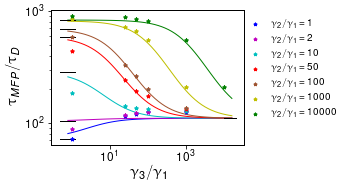

In [15]:
#x = np.genfromtxt('G1G2G3tG103tG23tG31tM1.txt').T
x = np.genfromtxt('Tg103Tg23Tg31Tm1g11.txt').T
x_Theory1 = np.logspace(-0.1,4.2)

y_Theory1 = np.zeros_like(x_Theory1)
y_Theory2 = np.zeros_like(x_Theory1)
y_Theory3 = np.zeros_like(x_Theory1)
y_Theory4 = np.zeros_like(x_Theory1)
y_Theory5 = np.zeros_like(x_Theory1)
y_Theory6 = np.zeros_like(x_Theory1)
y_Theory7 = np.zeros_like(x_Theory1)

y_Theory13 = np.zeros_like(x13)
y_Theory13 = np.full(x13.shape,tf_by_td(1.,1.0))
y_Theory14 = np.zeros_like(x13)
y_Theory14 = np.full(x13.shape,tf_by_td(1.,3.16))
y_Theory15 = np.zeros_like(x13)
y_Theory15 = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 100/101))
y_Theory16 = np.zeros_like(x13)
y_Theory16 = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 50/51))
y_Theory17 = np.zeros_like(x13)
y_Theory17 = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 10/11))
y_Theory18 = np.zeros_like(x13)
y_Theory18 = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 2/3))
y_Theory19 = np.zeros_like(x13)
y_Theory19 = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 1/2))
#
tg1_by_td = 0.316
tg2_by_td = 3.16
tg3_by_td = 1.0
tm_by_td = 1.0
#
for i,e in enumerate(x_Theory1):
    Den = e+1+1;
    td1_by_td = 1./Den;
    td2_by_td = 1./Den;
    td3_by_td = e/Den;
    y_Theory1[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+2+1;
    td1_by_td = 1./Den;
    td2_by_td = 2./Den;
    td3_by_td = e/Den;
    y_Theory2[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+10+1;
    td1_by_td = 1./Den;
    td2_by_td = 10./Den;
    td3_by_td = e/Den;
    y_Theory3[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+50+1;
    td1_by_td = 1./Den;
    td2_by_td = 50./Den;
    td3_by_td = e/Den;
    y_Theory4[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+100+1;
    td1_by_td = 1./Den;
    td2_by_td = 100./Den;
    td3_by_td = e/Den;
    y_Theory5[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+1000+1;
    td1_by_td = 1./Den;
    td2_by_td = 1000./Den;
    td3_by_td = e/Den;
    y_Theory6[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+10000+1;
    td1_by_td = 1./Den;
    td2_by_td = 10000./Den;
    td3_by_td = e/Den;
    y_Theory7[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)


@mpltex.acs_decorator
def my_plot3(x_Theory1):
    fig, ax = plt.subplots(1,1)
    ax.plot(x_Theory1,y_Theory1,'b')
    ax.plot(x_Theory1,y_Theory2,'m')
    ax.plot(x_Theory1,y_Theory3,'c')
    ax.plot(x_Theory1,y_Theory4,'r')
    ax.plot(x_Theory1,y_Theory5,'sienna')
    ax.plot(x_Theory1,y_Theory6,'y')
    ax.plot(x_Theory1,y_Theory7,'g')

    ax.plot(x13,y_Theory13,'k')
    ax.plot(x14,y_Theory14,'k')
    ax.plot(x14,y_Theory15,'k')
    ax.plot(x14,y_Theory16,'k')
    ax.plot(x14,y_Theory17,'k')
    ax.plot(x14,y_Theory18,'k')
    ax.plot(x14,y_Theory19,'k')
    
    ax.plot(x[0,:5],x[1,:5], 'b*', label = '$\\gamma_2/\\gamma_1 = 1$')
    ax.plot(x[0,:5],x[2,:5], 'm*', label = '$ \\gamma_2/\\gamma_1 = 2$')
    ax.plot(x[0,:5],x[3,:5], 'c*', label = '$\\gamma_2 /\\gamma_1 = 10$')
    ax.plot(x[0,:5],x[4,:5], 'r*', label = '$ \\gamma_2 /\\gamma_1 = 50$')
    ax.plot(x[0,:5],x[5,:5], markeredgecolor='sienna', marker='*', linestyle="None",label = '$ \\gamma_2/\\gamma_1 = 100$')
    ax.plot(x[0,:5],x[6,:5], 'y*', label = '$ \\gamma_2/\\gamma_1 = 1000$')
    ax.plot(x[0],x[7], 'g*', label = '$ \\gamma_2 /\\gamma_1 = 10000$')

    plt.xlabel('$\\gamma_3/\gamma_1$', size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$', size=15)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both',labelsize=12)
    ax.legend(loc = 'best',bbox_to_anchor=(0.95,1.0),fontsize=10)
    plt.savefig('newfigure/Articol/Gamma3Iner.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    
my_plot3(x_Theory1)     

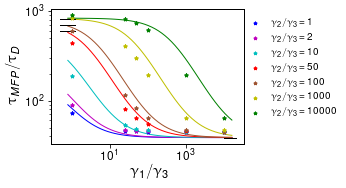

In [16]:
#x1 = np.genfromtxt('G1G2G3tG103tG23tG31tM1.txt').T
x1 = np.genfromtxt('Tg103Tg23Tg31Tm1g31.txt').T

x_Theory1 = np.logspace(-0.1,4.2)

y_Theory21 = np.zeros_like(x_Theory1)
y_Theory22 = np.zeros_like(x_Theory1)
y_Theory23 = np.zeros_like(x_Theory1)
y_Theory24 = np.zeros_like(x_Theory1)
y_Theory25 = np.zeros_like(x_Theory1)
y_Theory26 = np.zeros_like(x_Theory1)
y_Theory27 = np.zeros_like(x_Theory1)

y_Theory3c = np.zeros_like(x13)
y_Theory3c = np.full(x13.shape,tf_by_td(1.,0.316))

y_Theory2c = np.zeros_like(x13)
y_Theory2c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 10000/10001))
y_Theory4c = np.zeros_like(x13)
y_Theory4c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 1000/1001))
#y_Theory4 = np.zeros_like(x13)
#y_Theory4 = np.full(x13.shape,tf_by_td(1.,3.16))
y_Theory5c = np.zeros_like(x13)
y_Theory5c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 100/101))
y_Theory6c = np.zeros_like(x13)
y_Theory6c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 50/51))
y_Theory7c = np.zeros_like(x13)
y_Theory7c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 10/11))
y_Theory8c = np.zeros_like(x13)
y_Theory8c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 2/3))
y_Theory9c = np.zeros_like(x13)
y_Theory9c = np.full(x13.shape,tf_by_td_newDouble(1.,3.16, 0.316, 1/2))

#
tg1_by_td = 0.316
tg2_by_td = 3.16
tg3_by_td = 1.0
tm_by_td = 1.0
#
for i,e in enumerate(x_Theory1):
    Den = e+1+1;
    td1_by_td = e/Den;
    td2_by_td = 1./Den;
    td3_by_td = 1./Den;
    y_Theory21[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+2+1;
    td1_by_td = e/Den;
    td2_by_td = 2./Den;
    td3_by_td = 1./Den;
    y_Theory22[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+10+1;
    td1_by_td = e/Den;
    td2_by_td = 10./Den;
    td3_by_td = 1./Den;
    y_Theory23[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+50+1;
    td1_by_td = e/Den;
    td2_by_td = 50./Den;
    td3_by_td = 1./Den;
    y_Theory24[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+100+1;
    td1_by_td = e/Den;
    td2_by_td = 100./Den;
    td3_by_td = 1./Den;
    y_Theory25[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+1000+1;
    td1_by_td = e/Den;
    td2_by_td = 1000./Den;
    td3_by_td = 1./Den;
    y_Theory26[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    Den = e+10000+1;
    td1_by_td = e/Den;
    td2_by_td = 10000./Den;
    td3_by_td = 1./Den;
    y_Theory27[i] = tf_by_td_new(tm_by_td, tg1_by_td, tg2_by_td, tg3_by_td, td1_by_td, td2_by_td, td3_by_td)
    
    
@mpltex.acs_decorator
def my_plot3(x_Theory1):    
    fig, ax = plt.subplots(1,1,)
    ax.plot(x_Theory1,y_Theory21,'b')
    ax.plot(x_Theory1,y_Theory22,'m')
    ax.plot(x_Theory1,y_Theory23,'c')
    ax.plot(x_Theory1,y_Theory24,'r')
    ax.plot(x_Theory1,y_Theory25,'sienna')
    ax.plot(x_Theory1,y_Theory26,'y')
    ax.plot(x_Theory1,y_Theory27,'g',)

    ax.plot(x13,y_Theory3c,'k')
    #ax.plot(x14,y_Theory2c,'r')
    ax.plot(x14,y_Theory4c,'k')
    ax.plot(x14,y_Theory5c,'k')
    ax.plot(x14,y_Theory6c,'k')
    #ax.plot(x14,y_Theory7c,'.k')
    #ax.plot(x14,y_Theory8c,'.k')
    #ax.plot(x14,y_Theory9c,'.k') 

    ax.plot(x1[0],x1[1], 'b*', label ='$ \\gamma_2/\\gamma_3 = 1$')
    ax.plot(x1[0],x1[2], 'm*', label ='$ \\gamma_2/\\gamma_3 = 2$')
    ax.plot(x1[0],x1[3], 'c*', label ='$\\gamma_2/\\gamma_3 = 10$')
    ax.plot(x1[0],x1[4], 'r*', label ='$\\gamma_2/\\gamma_3 = 50$')
    ax.plot(x1[0],x1[5], markeredgecolor='sienna', marker='*', linestyle="None", label ='$ \\gamma_2/\\gamma_3 = 100$')
    ax.plot(x1[0],x1[6], 'y*', label ='$ \\gamma_2/\\gamma_3 = 1000$')
    ax.plot(x1[0],x1[7], 'g*', label ='$\\gamma_2/\\gamma_3 = 10000$')
    
    
    ax.tick_params(axis='both',labelsize=12)
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.xlabel('$\\gamma_1/\gamma_3$',size=15)
    plt.ylabel('$ \\tau_{MFP}/ \\tau_D$',size=15)
    #plt.title('tau_m/tau_D = 1, tau_G1/tau_D = 0.316, tau_G2/tau_D = 3.16, tau_G3/tau_D = 1.0,')
    ax.legend(loc='best',bbox_to_anchor=(0.95,1.0),fontsize=10)
    plt.savefig('newfigure/Articol/Gamma1Iner.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
my_plot3(x_Theory1)    

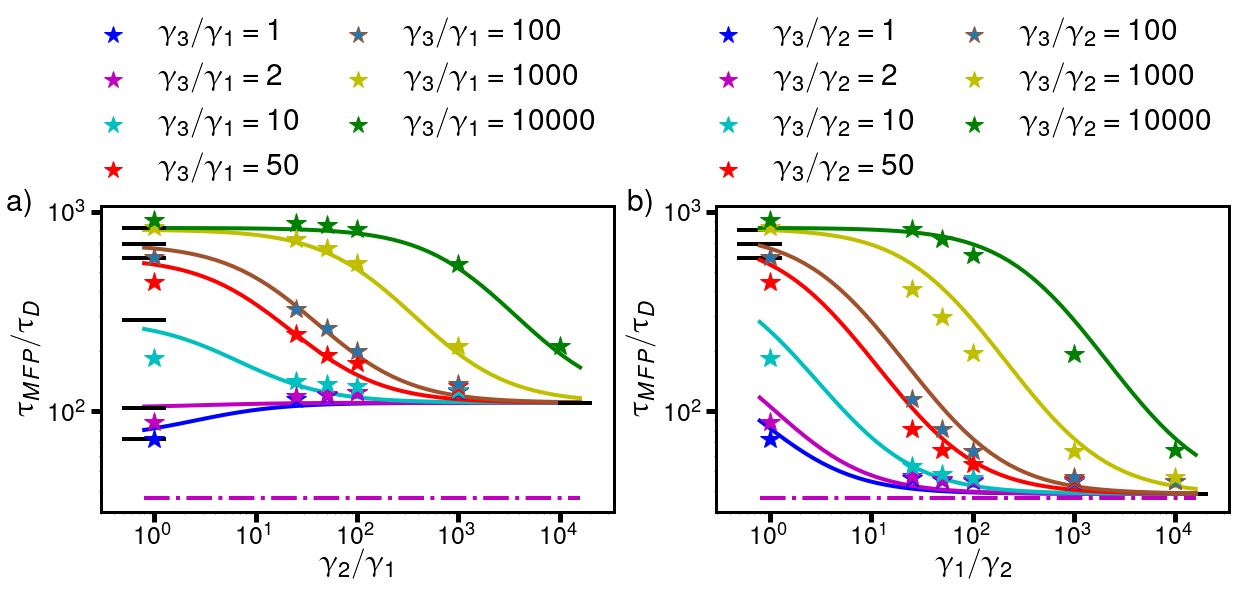

In [62]:
tm1 = np.full((100, 1), tf_by_td(1.,0.,3.))
xtm = np.logspace(-0.1,4.2, 100)

@mpltex.acs_decorator
def my_plot3(x_Theory1):
    fsize = np.array([3.25,2.20935])
    fig, ax = plt.subplots(1,2,figsize=(19,5))#figsize=[2.9*fsize[0], 1.3*fsize[1]])

    ax[0].plot(x_Theory1,y_Theory1,'b',lw=4)
    ax[0].plot(x_Theory1,y_Theory2,'m',lw=4)
    ax[0].plot(x_Theory1,y_Theory3,'c',lw=4)
    ax[0].plot(x_Theory1,y_Theory4,'r',lw=4)
    ax[0].plot(x_Theory1,y_Theory5,'sienna',lw=4)
    ax[0].plot(x_Theory1,y_Theory6,'y',lw=4)
    ax[0].plot(x_Theory1,y_Theory7,'g',lw=4)

    ax[0].plot(x13,y_Theory13,'k',lw=4)
    ax[0].plot(x14,y_Theory14,'k',lw=4)
    ax[0].plot(x14,y_Theory15,'k',lw=4)
    ax[0].plot(x14,y_Theory16,'k',lw=4)
    ax[0].plot(x14,y_Theory17,'k',lw=4)
    ax[0].plot(x14,y_Theory18,'k',lw=4)
    ax[0].plot(x14,y_Theory19,'k',lw=4)
    
    
    ax[0].plot(x[0,:5],x[1,:5], 'b*', markersize = 20, label = '$\\gamma_3/\\gamma_1 = 1$')
    ax[0].plot(x[0,:5],x[2,:5], 'm*', markersize = 20, label = '$ \\gamma_3/\\gamma_1 = 2$')
    ax[0].plot(x[0,:5],x[3,:5], 'c*', markersize = 20, label = '$\\gamma_3/\\gamma_1 = 10$')
    ax[0].plot(x[0,:5],x[4,:5], 'r*', markersize = 20, label = '$ \\gamma_3/\\gamma_1 = 50$')
    ax[0].plot(x[0,:5],x[5,:5], markeredgecolor='sienna', marker='*', markersize = 20, linestyle="None",label = '$ \\gamma_3/\\gamma_1 = 100$')
    ax[0].plot(x[0,:5],x[6,:5], 'y*', markersize = 20, label = '$ \\gamma_3/\\gamma_1 = 1000$')
    ax[0].plot(x[0],x[7], 'g*', markersize = 20, label = '$ \\gamma_3/\\gamma_1 = 10000$')

    ax[0].plot(xtm, tm1, 'm-.',lw=4)
    
    ax[0].tick_params(axis='both',labelsize=30)
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].set_xlabel('$\\gamma_2/\gamma_1$',size=30)
    ax[0].set_ylabel('$ \\tau_{MFP}/ \\tau_D$',size=30)
    
    #ax[0].legend(loc='best',bbox_to_anchor=(0.5,2), ncol=3,fontsize=30)
    #ax[0].text(4e5,6.8e2,'$\\gamma_3/\gamma_1=1$',size=11, color = 'k') # 3e5
    #ax[0].text(4e5,4.3e2,'$\\gamma_3/\gamma_1=2$',size=11, color = 'k')
    #ax[0].text(3e5,2.65e2,'$\\gamma_3/\gamma_1=10$',size=11, color = 'k')
    #ax[0].text(3e5,1.65e2,'$\\gamma_3/\gamma_1=50$',size=11, color = 'k')
    #ax[0].text(2.5e5,1e2,'$\\gamma_3/\gamma_1=100$',size=11, color = 'k')  #9.5e7
    #ax[0].text(1.8e5,6.3e1,'$\\gamma_3/\gamma_1=1000$',size=11, color = 'k')
    #ax[0].text(1.3e5,3.7e1,'$\\gamma_3/\gamma_1=10000$',size=11, color = 'k')
  
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_linewidth(3)
   
    ax[0].tick_params(axis='both',labelsize=25,length = 10,width = 5)   
    #plt.title('tau_m/tau_D = 1, tau_G1/tau_D = 0.316, tau_G2/tau_D = 3.16, tau_G3/tau_D = 1.0,')
    ax[0].legend(loc='best',bbox_to_anchor=(1.02,1.7),ncol=2,fontsize=30)
    #plt.savefig('newfigure/Articol/Gamma1Iner.pdf', bbox_inches='tight')
    
    ax[1].plot(x13,y_Theory3c,'k',lw=4)
    ax[1].plot(x14,y_Theory4c,'k',lw=4)
    ax[1].plot(x14,y_Theory5c,'k',lw=4)
    ax[1].plot(x14,y_Theory6c,'k',lw=4)
    
    ax[1].plot(x_Theory1,y_Theory21,'b',lw=4)
    ax[1].plot(x_Theory1,y_Theory22,'m',lw=4)
    ax[1].plot(x_Theory1,y_Theory23,'c',lw=4)
    ax[1].plot(x_Theory1,y_Theory24,'r',lw=4)
    ax[1].plot(x_Theory1,y_Theory25,'sienna',lw=4)
    ax[1].plot(x_Theory1,y_Theory26,'y',lw=4)
    ax[1].plot(x_Theory1,y_Theory27,'g',lw=4)
    
    ax[1].plot(x1[0],x1[1], 'b*', markersize = 20, label ='$ \\gamma_3/\\gamma_2 = 1$')
    ax[1].plot(x1[0],x1[2], 'm*', markersize = 20, label ='$ \\gamma_3/\\gamma_2 = 2$')
    ax[1].plot(x1[0],x1[3], 'c*', markersize = 20, label ='$\\gamma_3/\\gamma_2 = 10$')
    ax[1].plot(x1[0],x1[4], 'r*', markersize = 20, label ='$\\gamma_3/\\gamma_2 = 50$')
    ax[1].plot(x1[0],x1[5], markeredgecolor='sienna', markersize = 20, marker='*', linestyle="None", label ='$ \\gamma_3/\\gamma_2 = 100$')
    ax[1].plot(x1[0],x1[6], 'y*', markersize = 20, label ='$ \\gamma_3/\\gamma_2 = 1000$')
    ax[1].plot(x1[0],x1[7], 'g*', markersize = 20, label ='$\\gamma_3/\\gamma_2 = 10000$')
    
    ax[1].plot(xtm, tm1, 'm-.',lw=4)
    
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].set_xlabel('$\\gamma_1/\gamma_2$',size=30)
    ax[1].set_ylabel('$ \\tau_{MFP}/ \\tau_D$',size=30)
    
    ax[1].legend(loc='best',bbox_to_anchor=(1.02,1.7), ncol=2,fontsize=30)
    
    ax[1].text(3e-8,1e3,'a)',size=30, color = 'k')
    ax[1].text(4e-2,1e3,'b)',size=30, color = 'k')
  
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[1].spines[spine].set_linewidth(3)
   
    ax[1].tick_params(axis='both',labelsize=25,length = 10,width = 5) 
    
    #plt.subplots_adjust(bottom=0.32,wspace=1.5,top = 0.9)
    #plt.savefig('Triple.pdf', bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
my_plot3(x_Theory1)    